In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 8b

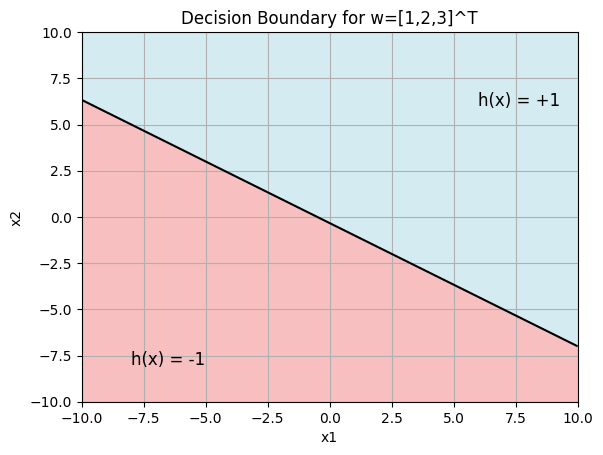

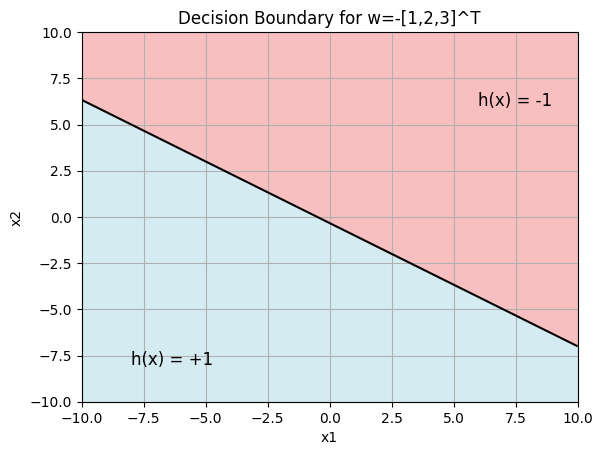

In [ ]:
X1, X2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
w1 = [1, 2, 3]
w2 = [-1, -2, -3]
Z1 = w1[0] + w1[1]*X1 + w1[2]*X2
Z2 = w2[0] + w2[1]*X1 + w2[2]*X2

plt.contour(X1, X2, Z1, levels=[0], colors="black")
plt.contourf(X1, X2, Z1, levels=[-np.inf, 0, np.inf], colors=["lightcoral", "lightblue"], alpha=0.5)
plt.text(-8, -8, "h(x) = -1", fontsize=12, color="black")
plt.text(6, 6, "h(x) = +1", fontsize=12, color="black")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary for w=[1,2,3]^T")
plt.grid()
plt.show()

plt.contour(X1, X2, Z2, levels=[0], colors="black")
plt.contourf(X1, X2, Z2, levels=[-np.inf, 0, np.inf], colors=["lightcoral", "lightblue"], alpha=0.5)
plt.text(-8, -8, "h(x) = +1", fontsize=12, color="black")
plt.text(6, 6, "h(x) = -1", fontsize=12, color="black")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary for w=-[1,2,3]^T")
plt.grid()
plt.show()

# 9

In [37]:
def GenerateData(margin, number):
    data = []
    i = 0
    while i < number:
        point = np.random.randn(2, 1)
        if point[0] + point[1] - margin > 0:
            data.append([point, 0])
            i += 1
        elif point[0] + point[1] + margin < 0:
            data.append([point, 1])
            i += 1
    return data

def plot_data(data):
    max_bound = 0
    for point, label in data:
        if abs(point[0]) > max_bound:
            max_bound = abs(point[0])
        if abs(point[1]) > max_bound:
            max_bound = abs(point[1])
        if label == 0:
            plt.scatter(point[0], point[1], color="blue", marker="o")
        else:
            plt.scatter(point[0], point[1], color="red", marker="x")

    plt.xlim(-max_bound-1, max_bound+1)
    plt.ylim(-max_bound-1, max_bound+1)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.scatter([], [], color="blue", marker="o", label="Positive")
    plt.scatter([], [], color="red", marker="x", label="Negative")
    plt.legend(loc="best")

## a

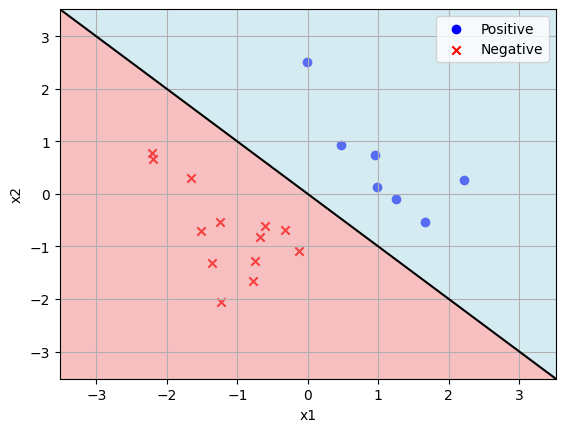

In [55]:
data = GenerateData(1, 20)
plot_data(data)
plt.contour(X1, X2, X1 + X2, levels=[0], colors="black")
plt.contourf(X1, X2, X1 + X2, levels=[-np.inf, 0, np.inf], colors=["lightcoral", "lightblue"], alpha=0.5)
plt.show()

## b

# updates until convergence: 2


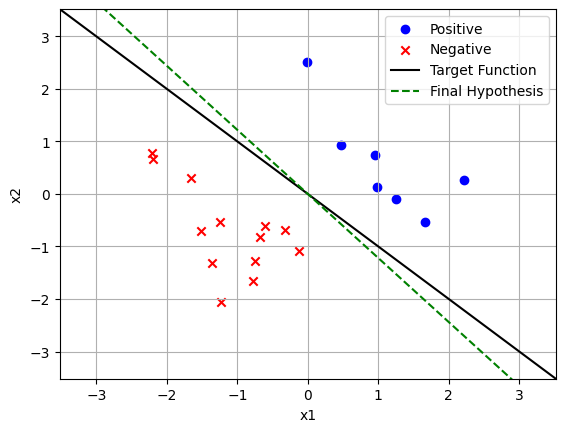

In [56]:
def perceptron_plot(data):
    w = np.zeros((3, 1))
    updates = 0
    converged = False
    while not converged:
        converged = True
        for point, label in data:
            x = np.vstack(([1], point))
            y = 1 if label == 0 else -1
            if y * (w.T @ x) <= 0:
                w += y * x
                updates += 1
                converged = False
    print(f"# updates until convergence: {updates}")

    plot_data(data)
    Z = w[0] + w[1]*X1 + w[2]*X2
    plt.plot([], [], color="black", label="Target Function")
    plt.plot([], [], color="green", linestyle="dashed", label="Final Hypothesis")
    plt.contour(X1, X2, X1 + X2, levels=[0], colors="black")
    plt.contour(X1, X2, Z, levels=[0], colors="green", linestyles="dashed")
    plt.legend(loc="best")
    plt.show()

perceptron_plot(data)

$f$ is decently close to $g$. Perceptron algorithm aims to find a good balance between
the two clusters and will consequently adapt to the data rather than the true
target function. Because the data is generated from the normal distribution,
it will always be distributed around (0, 0) hence the decision boundary will
also always intersect the origin.

## c

# updates until convergence: 2


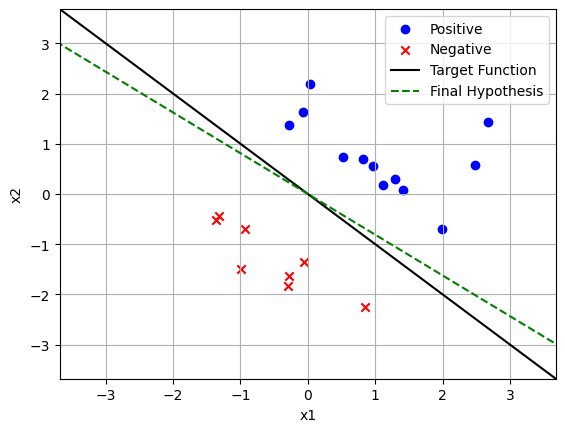

In [59]:
perceptron_plot(GenerateData(1, 20))

Same observation as in part (b).

## d

# updates until convergence: 2


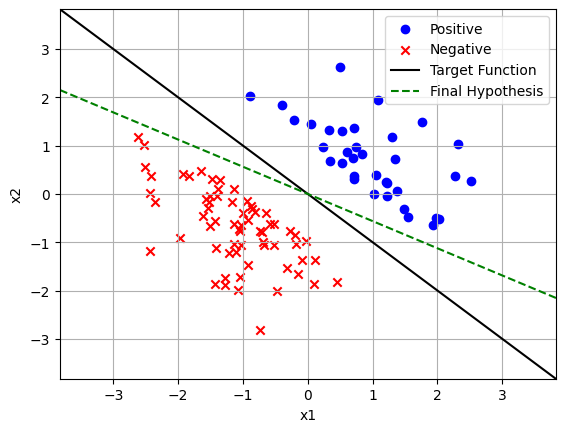

In [60]:
perceptron_plot(GenerateData(1, 100))

Same observation as in part (b).

## e

# updates until convergence: 4


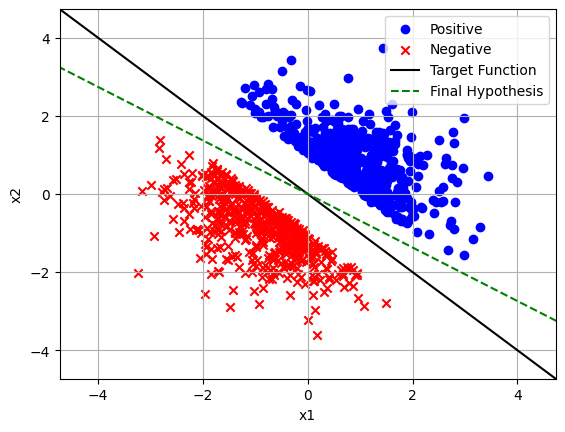

In [61]:
perceptron_plot(GenerateData(1, 1000))

Same observation as in part (b).